In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import csv

In [2]:
# path="C:/Users/Owner/OneDrive/Desktop/B Tech Project/Dataset\Admission_Predict.csv"
path="C:/Users/Sayali Mate/Downloads/archive (1)/Admission_Predict.csv"
df=pd.read_csv(path)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop(['Serial No.'],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# df['Admission_Status'] = (df['Chance of Admit '] > 0.5).astype(int)

In [5]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:>

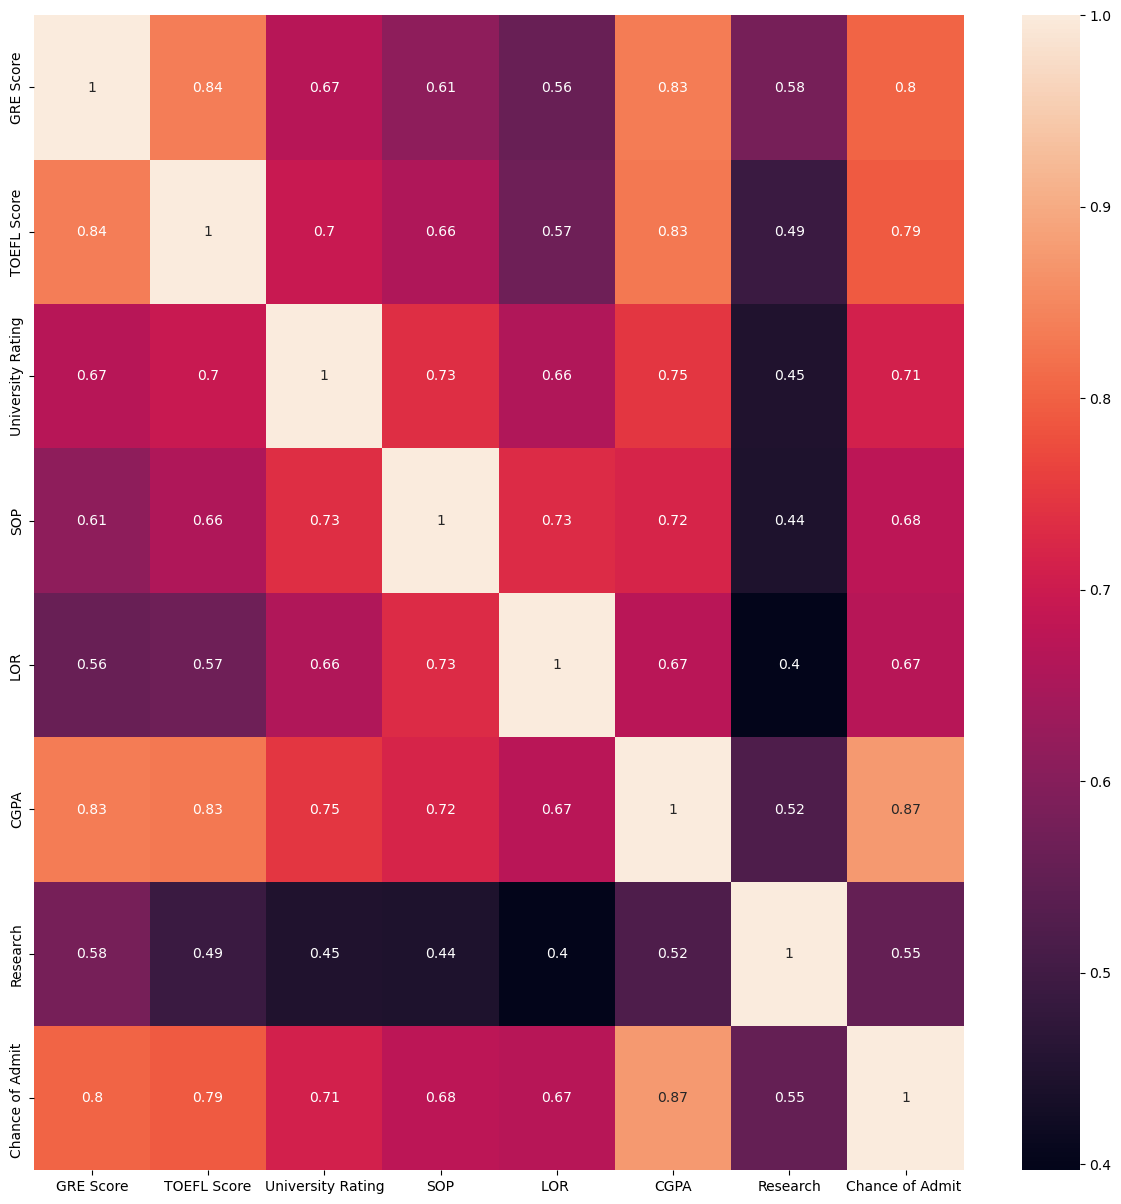

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [7]:
df.columns[-1]

'Chance of Admit '

In [8]:
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

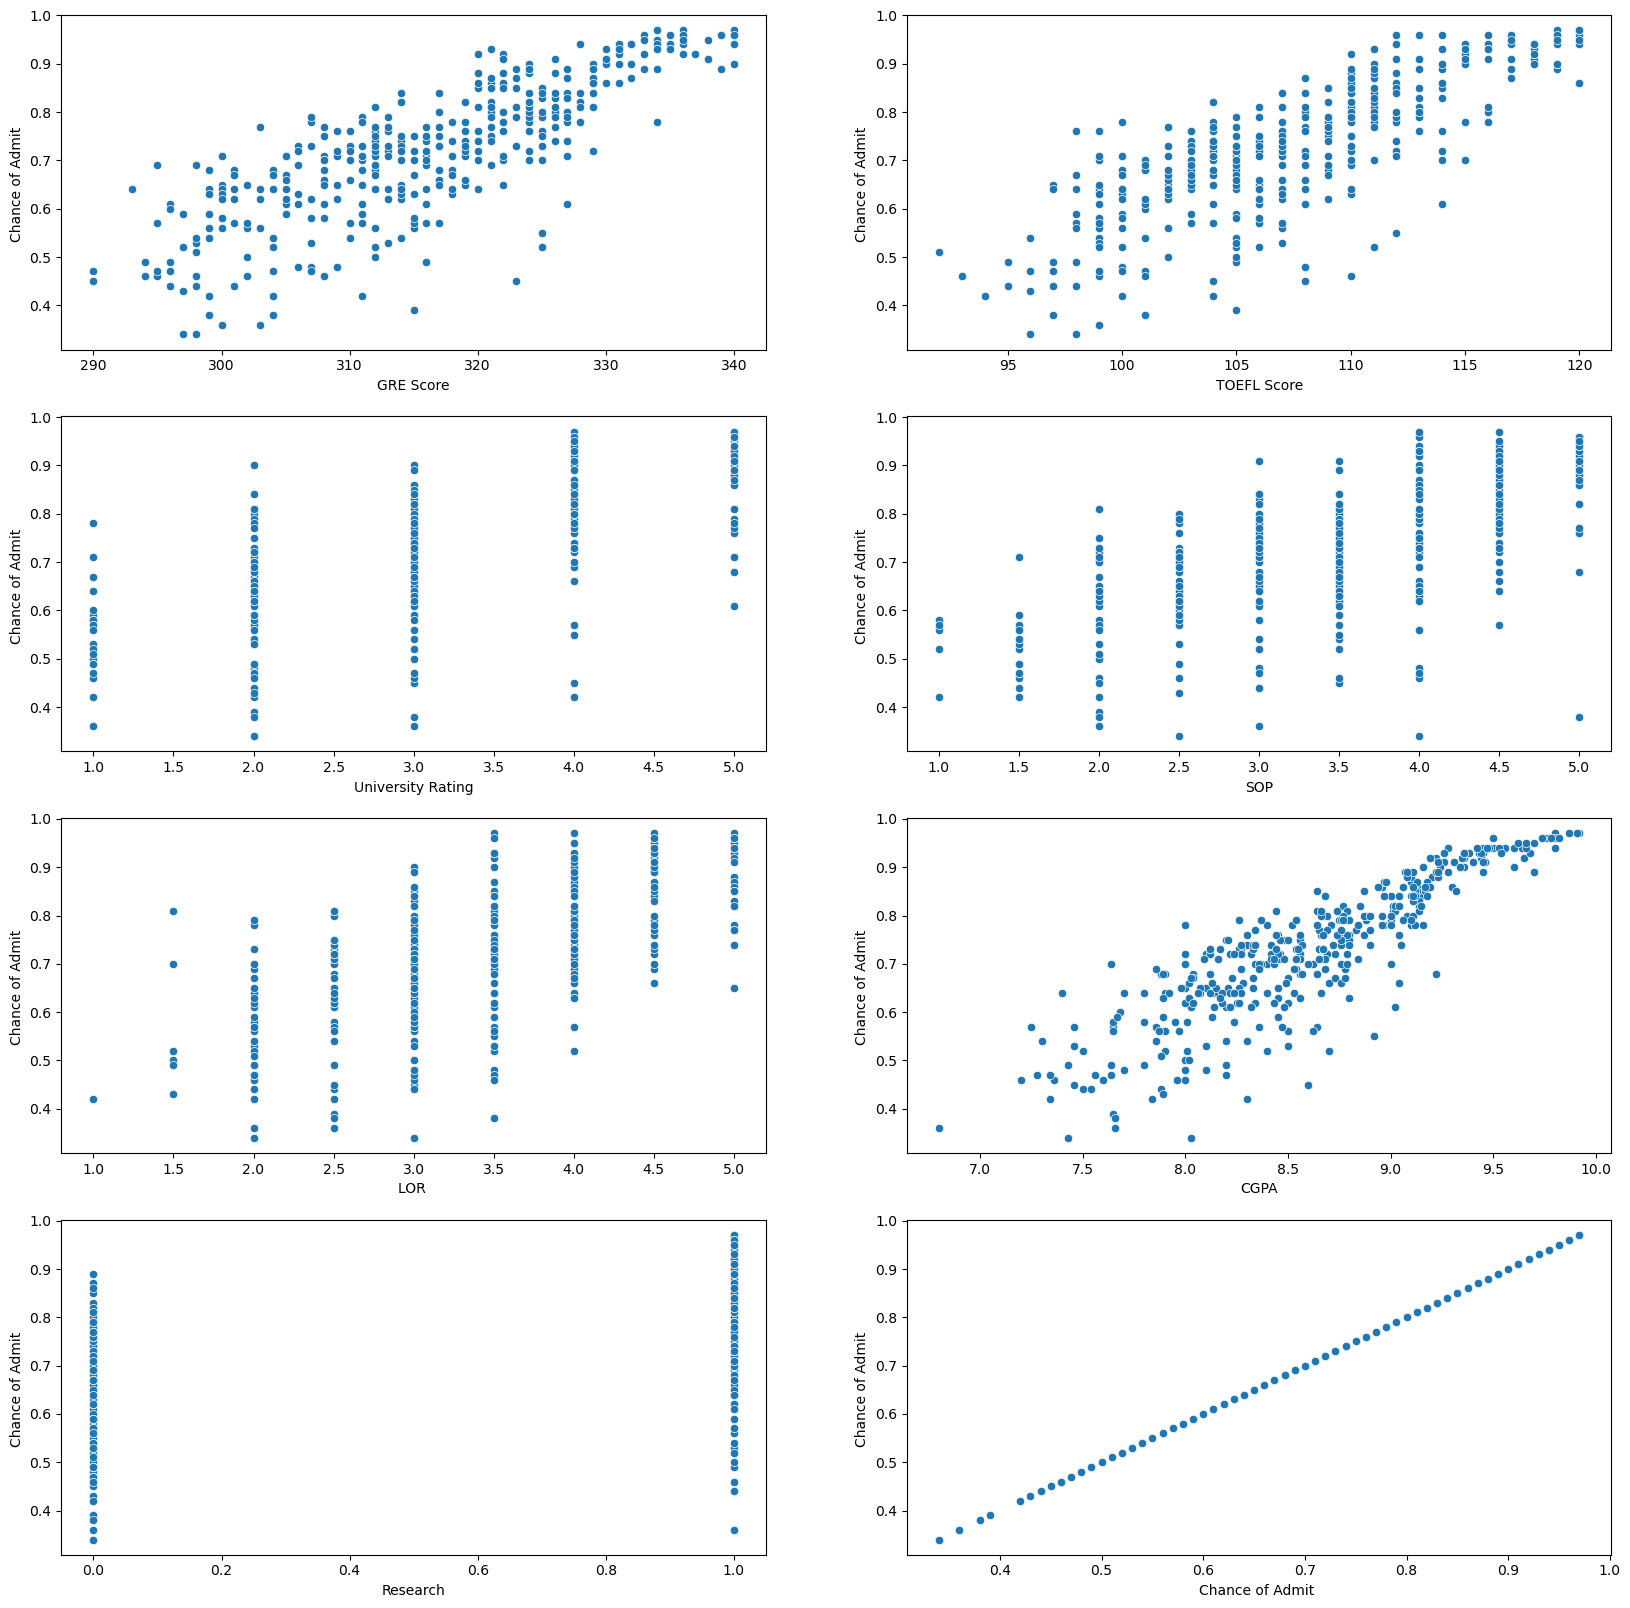

In [9]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.scatterplot(data=df, x=column, y=df.columns[-1])
    plotnumber+=1
plt.show()

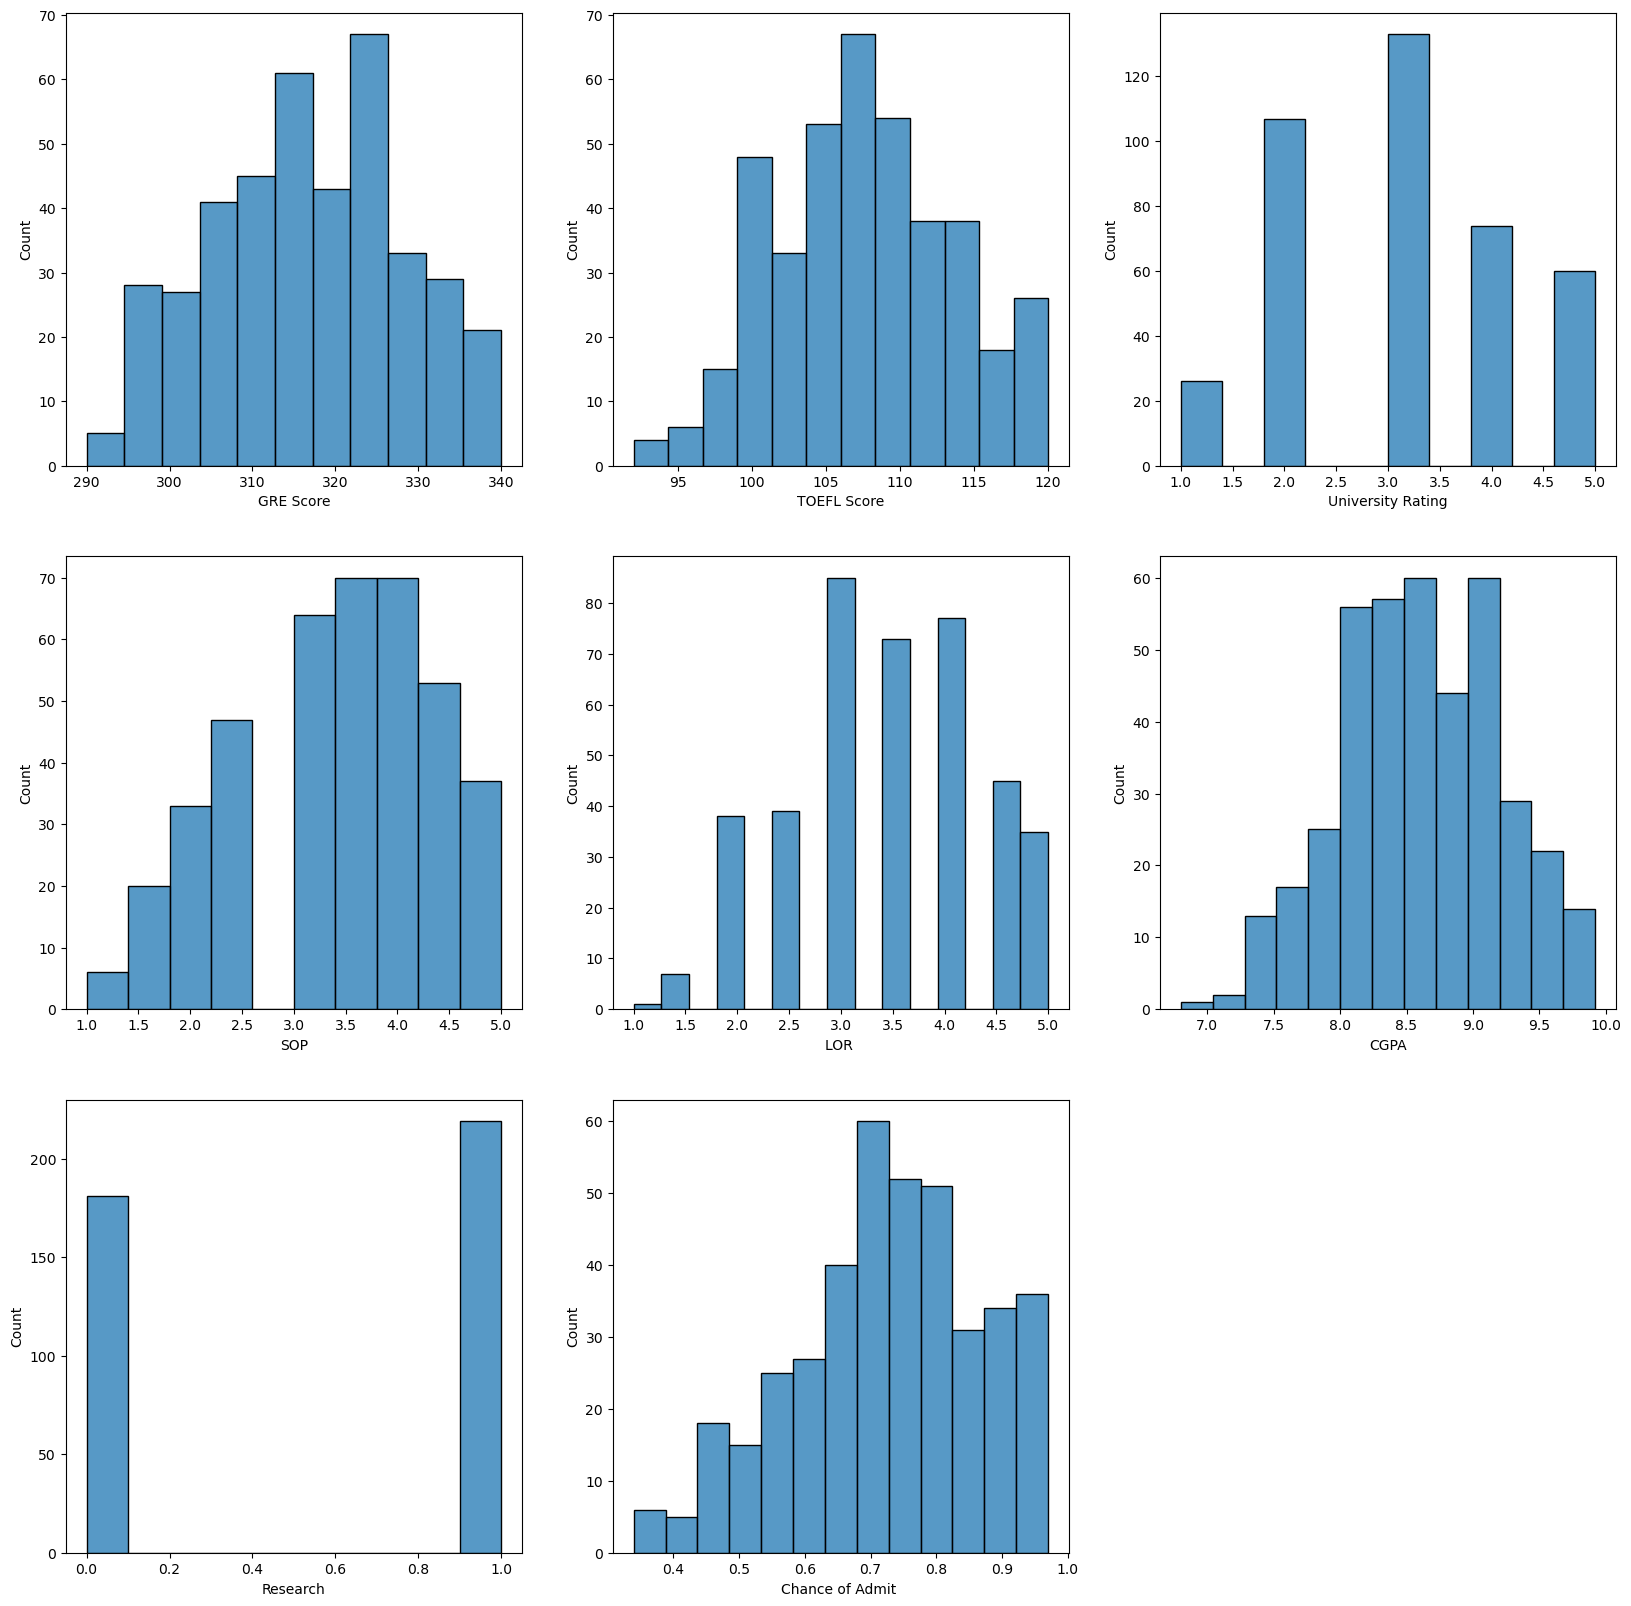

In [10]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=8:
        plt.subplot(3,3,plotnumber)
        sns.histplot(df,x=column)
    plotnumber+=1
plt.show()

In [11]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
columns_to_keep = [col for col in df.columns if col not in ['University Rating']]

X=df[columns_to_keep]
# X = df.drop(columns=['University Name Encoded','University Name','Degree','Course Name'])
y = df['University Rating']

# ros = RandomOverSampler(random_state=42)
over = SMOTE(sampling_strategy='not majority', random_state=42)
# under = RandomUnderSampler(sampling_strategy='not minority', random_state=42)

# over=ADASYN()
# steps = [('o', over), ('u', under)]
steps = [('o', over)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = over.fit_resample(X, y)

# Convert the resampled arrays back to a DataFrame if needed
df = pd.DataFrame(X_resampled, columns=X.columns)
df['University Rating'] = y_resampled


In [13]:
# X=df.drop('Admission_Status', axis=1)
X=df.drop('Chance of Admit ',axis=1)

In [14]:
y=df['Chance of Admit ']


In [15]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.64234317,  1.64199261,  1.02220546, ...,  1.60039078,
         1.01668045,  0.70710678],
       [ 0.6053074 ,  0.01886073,  0.58688965, ...,  0.44980973,
         1.01668045,  0.70710678],
       [-0.03286846, -0.42381161, -0.28374198, ..., -0.83353067,
         1.01668045,  0.        ],
       ...,
       [ 1.16371128,  1.19932028,  0.71617019, ...,  1.06890805,
         1.01668045,  1.41421356],
       [ 0.28621947,  0.46153306,  1.45752128, ...,  0.94732185,
         1.01668045,  1.41421356],
       [ 1.16371128,  1.19932028,  0.58688965, ...,  1.03259264,
         1.01668045,  1.41421356]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1

LinearRegression()

In [18]:
model1.fit(X_train, y_train)


LinearRegression()

In [19]:
# from sklearn.metrics import accuracy_score

# train_predictions = model1.predict(X_train)
# test_predictions = model1.predict(X_test)

# # Calculate accuracy
# train_accuracy = accuracy_score(y_train, train_predictions)
# test_accuracy = accuracy_score(y_test, test_predictions)



In [20]:
y_pred=model1.predict(X_test)

In [21]:
r2_score = model1.score(X_train,y_train)
print("Training accuracy ",r2_score*100,'%')

Training accuracy  87.51066897492828 %


In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Testing accuracy {}%".format(round(score, 2) *100))

Testing accuracy 86.0%


In [23]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report


# SVM model training
svm_model = SVR(kernel='linear')  # Linear kernel
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

r2_score = model1.score(X_train,y_train)
print("Training accuracy ",r2_score*100,'%')


from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Testing accuracy {}%".format(round(score, 2) *100))



Training accuracy  87.51066897492828 %
Testing accuracy 79.0%


In [24]:
# print(train_accuracy)
# print(test_accuracy)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

# model = Sequential()
# model.add(Dense(32, activation='relu', input_dim=7))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='linear'))


# model = Sequential()  94,78
# model.add(Dense(64, activation='relu', input_dim=7))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(2, activation='relu'))
# model.add(Dense(1))

# model = Sequential([  96,83
#     Dense(128, activation='relu', input_dim=7),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(8, activation='relu'),
#     Dense(1)  # No activation function for regression
# ])

# model = Sequential([  97,83
#     Dense(256, activation='relu', input_dim=7),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(8, activation='relu'),
#     Dense(1)  # No activation function for regression
# ])

#  96,84
model = Sequential([
    Dense(256, activation='relu', input_dim=7),
    Dense(128, activation='relu'),
    Dropout(0.01),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.01),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # No activation function for regression
])

# model = Sequential([ 
#     Dense(256, activation='relu', input_dim=7),
#     Dense(128, activation='relu'),
#     Dropout(0.01),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dense(32, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.01),
#     Dense(16, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.01),
#     Dense(8, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.01),
#     Dense(1)  # No activation function for regression
# ])



In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                5

In [27]:
keras.utils.plot_model(model, to_file = "overall_admit_percent_architecture.png", show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
model.compile(loss='mean_squared_error', optimizer='Adam')
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)


Epoch 1/200

13/13 [==============================] - 4s 48ms/step - loss: 0.2792 - val_loss: 0.0684
Epoch 2/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0466 - val_loss: 0.0182
Epoch 3/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0152 - val_loss: 0.0127
Epoch 4/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0084 - val_loss: 0.0079
Epoch 5/200
13/13 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 6/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 7/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 10/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0036 - val_loss: 0.00

13/13 [==============================] - 0s 12ms/step - loss: 9.4752e-04 - val_loss: 0.0042
Epoch 78/200
13/13 [==============================] - 0s 13ms/step - loss: 9.8568e-04 - val_loss: 0.0038
Epoch 79/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 80/200
13/13 [==============================] - 0s 12ms/step - loss: 8.0945e-04 - val_loss: 0.0039
Epoch 81/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 82/200
13/13 [==============================] - 0s 12ms/step - loss: 9.5881e-04 - val_loss: 0.0037
Epoch 83/200
13/13 [==============================] - 0s 13ms/step - loss: 9.8001e-04 - val_loss: 0.0038
Epoch 84/200
13/13 [==============================] - 0s 13ms/step - loss: 8.8070e-04 - val_loss: 0.0035
Epoch 85/200
13/13 [==============================] - 0s 12ms/step - loss: 6.8608e-04 - val_loss: 0.0037
Epoch 86/200
13/13 [==============================] - 0s 12ms/step - loss: 8

Epoch 155/200
13/13 [==============================] - 0s 12ms/step - loss: 5.8130e-04 - val_loss: 0.0037
Epoch 156/200
13/13 [==============================] - 0s 13ms/step - loss: 4.8708e-04 - val_loss: 0.0036
Epoch 157/200
13/13 [==============================] - 0s 11ms/step - loss: 4.4485e-04 - val_loss: 0.0045
Epoch 158/200
13/13 [==============================] - 0s 11ms/step - loss: 5.0238e-04 - val_loss: 0.0040
Epoch 159/200
13/13 [==============================] - 0s 11ms/step - loss: 4.7213e-04 - val_loss: 0.0041
Epoch 160/200
13/13 [==============================] - 0s 12ms/step - loss: 4.0483e-04 - val_loss: 0.0040
Epoch 161/200
13/13 [==============================] - 0s 10ms/step - loss: 5.4262e-04 - val_loss: 0.0039
Epoch 162/200
13/13 [==============================] - 0s 11ms/step - loss: 4.4631e-04 - val_loss: 0.0041
Epoch 163/200
13/13 [==============================] - 0s 12ms/step - loss: 4.6290e-04 - val_loss: 0.0041
Epoch 164/200
13/13 [=========================

In [29]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [30]:
from sklearn.metrics import r2_score
print("Training acc:")
r2_score(y_train, y_pred_train)

Training acc:


0.9542378648566991

In [31]:
from sklearn.metrics import r2_score
print("Testing acc:")
r2_score(y_test, y_pred_test)

Testing acc:


0.8114296817299704

In [32]:
# import joblib
# joblib.dump(model1, 'admit_percent_ann_84acc.pkl')

In [33]:
model.save('Overall_admit_percent.h5')

C:\Users\Sayali Mate\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
